In [1]:
from manim import *
from manim_extensions import *
from circuits.circuit_mobjects import *
import circuits.theoretical as tl
from stickman import *

Manim Community v0.15.2

In [2]:
%%manim -v WARNING -qm Intro

class Intro(Scene):
    def construct(self):
        # Build Circuit
        circuit = tl.ACCircuit(nodes=4, w=0)
        circuit.add(
            tl.Wire(0, 1),
            tl.IndependantVoltage(4, 2, 0),
            tl.Wire(2, 3),
            tl.Resistor(4, 1, 3)
        )

        circuit.nodal_analysis()
        circuit.calculate_currents()

        cmob_circuit = circuit.get_mobjects(
            np.array([
                DL * 2,
                DR * 2,
                UL * 2,
                UR * 2
            ]),
            {
                (0, 2): {"label": "4V"},
                (1, 3): {"label": "4Ω"}
            },
            do_colored_voltage=True
        )

        timer = cmob_circuit.get_timer()
        cmobjects = cmob_circuit.get_circuit_mobjects()
        currents = cmob_circuit.get_current_mobjects()
        # Circuit Built

        # Circuit Offset
        pcircuit_offset = ComplexValueTracker(0)
        circuit_offset = ComplexValueTracker(0)
        def circuit_offset_updater(m):
            z = circuit_offset.get_value() - pcircuit_offset.get_value()
            z = np.array([np.real(z), np.imag(z), 0])
            cmob_circuit.coords += z
            cmobjects.shift(z)
            pcircuit_offset.set_value(circuit_offset.get_value())
        circuit_offset.add_updater(circuit_offset_updater)
        
        # Begin Animation
        time = 1
        self.add(cmobjects, currents)
        self.play(timer.animate.set_value(time), run_time=time, rate_func=linear)
        
        surr_rect = SurroundingRectangle(
            VGroup(
                cmobjects[2, 0][1],
                cmobjects[2, 0].get_label()
            )
        )
        time = 2
        self.play(
            timer.animate(rate_func=linear).increment_value(time),
            Succession(Create(surr_rect), FadeOut(surr_rect)),
            run_time=time
        )

        title = Text("Voltage").scale(2).to_edge(DOWN)
        time = 1
        self.play(
            timer.animate(rate_func=linear).increment_value(time),
            circuit_offset.animate.set_value(0.5j),
            Write(title),
            run_time=time
        )
        
        time = 1
        self.play(
            timer.animate(rate_func=linear).increment_value(time),
        )
        


In [2]:
%%manim -v WARNING -ql VoltageDefinition

class VoltageDefinition(Scene):
    def construct(self):
        electric = Text("Electric")
        potential = Text("Potential")
        difference = Text("Difference")

        group = VGroup(electric, potential, difference)
        group.arrange(DOWN).scale(2.5)
        time = 2.5
        self.play(Succession(*[FadeIn(word) for word in group]), lag_ratio=1.5, run_time=time)
        self.wait()
        self.play(Indicate(electric, color=BLUE, rate_func=smooth))
        self.wait()

        self.play(electric.animate.scale(1/1.2))
        self.wait()

        self.play(Indicate(potential, color=BLUE, rate_func=smooth))
        self.wait()
        
        self.play(potential.animate.scale(1/1.2))
        self.wait()

        self.play(Indicate(difference, color=BLUE, rate_func=smooth))
        self.wait()
        



In [4]:
%%manim -v WARNING -qm --flush_cache StickManTest

class StickManTest(Scene):
    def construct(self):
        stickman = StickMan(leg_angle=np.pi / 6).scale(2/3).shift(LEFT).rotate(PI)
        self.play(Create(stickman))
        self.play(stickman.wiggle_right_arm())
        # rotated_stickman = stickman.copy().rotate(PI)
        # self.play(stickman.wiggle_right_arm())
        self.play(stickman.animate.rotate(PI))
        self.wait()


In [3]:
%%manim -v WARNING -qm GravitationalPotentialEnergy

class GravitationalPotentialEnergy(Scene):
    def construct(self):
        skyscraper = SVGMobject("./svgs/skyscraper.svg").scale(3)
        self.add(skyscraper)

        self.wait()
        height_count = ValueTracker(0)
        height_count_width = 0.3
        line1 = Line(height_count_width / 2 * LEFT, height_count_width / 2 * RIGHT)
        line2 = always_redraw(lambda: line1.copy().shift(height_count.get_value() * UP))
        line3 = always_redraw(lambda: DashedLine(line1.get_midpoint(), line2.get_midpoint()))
        text  = always_redraw(lambda: Text(str(round(height_count.get_value() / 6 * 300)) + "m").next_to(line3, LEFT))
        line1.next_to(skyscraper, LEFT).align_to(skyscraper, DOWN)
        height_count_group = VGroup(line1, line2, line3, text)
        self.add(height_count_group)
        self.play(height_count.animate.set_value(6), run_time=3)

        self.wait()
        self.play(FadeOut(height_count_group, run_time=0.3), skyscraper.animate.scale(20).align_to(ORIGIN, UR))
        self.wait()

        stickman = StickMan(LEFT + UP * 1.5 + RIGHT * 0.5, leg_angle=np.pi / 6)
        ball = Circle(radius=0.3, color=RED, fill_opacity=1).move_to(stickman.get_right_arm_end() + RIGHT * 0.3)
        stickman.get_right
        self.play(Succession(Create(stickman), Create(ball, run_time=0.2)))

        # PE Equation
        starts = [6, 27]
        pe = MathTex(r"PE &= mgh\\ &= (1kg)(9.8\frac{m}{s^2})(300m)\\ &= 2940J").shift(RIGHT * 4)
        pe = pe[0]
        self.play(Write(pe[:starts[0]]))
        self.wait()
        self.play(ReplacementTransform(pe[2:starts[0]].copy(), pe[starts[0]:starts[1]]))
        self.wait()
        self.play(ReplacementTransform(pe[starts[0]:starts[1]].copy(), pe[starts[1]:]))
        
        # Ball drop
        self.play(
            stickman.right_arm.animate(run_time=0.2).rotate(PI / 10, about_point=stickman.get_left_arm_start()),
            ball.animate(rate_func=lambda a: a**2, run_time=1).shift(DOWN * 8)
        )

        
        self.wait()


In [9]:
SPRING_PE_COLOR = YELLOW_C
ELECTRIC_PE_COLOR = "#2136c2"

In [53]:
%%manim -v WARNING -qm SpringPotentialEnergy

class SpringPotentialEnergy(Scene):
    def construct(self):
        inductor = InductorElement(DOWN * 4, ORIGIN, 1, 4, 1)
        spring = VGroup(
            inductor,
            Line().align_to(inductor, UP)
        )
        self.add(spring)

        equilibrium = DashedLine(LEFT * 3, RIGHT * 3, color=GRAY)

        scale_width = 0.3
        line1 = Line(ORIGIN, RIGHT * scale_width).align_to(equilibrium, LEFT)
        line2 = always_redraw(lambda: line1.copy().align_to(spring[1], DOWN))
        line3 = always_redraw(lambda: DashedLine(line1.get_center(), line2.get_center()))
        self.add(line1, line2, line3)
        
        scale = ValueTracker(1)
        scale.prev = scale.get_value()
        def spring_updater(m):
            spring.stretch(scale.get_value() / scale.prev, 1, about_edge=DOWN)
            scale.prev = scale.get_value()
        spring.add_updater(spring_updater)

        spring_size = 1
        k = 1000
        max_pe = 125
        def get_dx():
            return spring_size * (1 - scale.get_value())
        def get_pe():
            return 0.5 * k * get_dx() ** 2
        pe = always_redraw(lambda: MathTex("PE=" + str(round(get_pe(), 1)) + "J").next_to(equilibrium, RIGHT))
        ke = always_redraw(lambda: MathTex("KE=" + str(round(max_pe - get_pe(), 1)) + "J").next_to(pe, UP).align_to(pe, LEFT))
        spring.add_updater(lambda m: m.set_color(interpolate_color(WHITE, SPRING_PE_COLOR, get_pe() / max_pe)))
        
        self.add(pe, ke)

        self.play(Create(equilibrium), run_time=0.5)

        ball = Circle(radius=0.3, color=RED, fill_opacity=1).shift(UP * 5)
        self.play(ball.animate.shift(DOWN * 4.7), rate_func=linear, run_time=0.3)
        ball_updater = lambda m: m.move_to(spring[1].get_center() + UP * 0.3)
        ball.add_updater(ball_updater)
        
        rate_func = lambda a: (1 - np.exp(-a * 4)) / (1 - np.exp(-4))
        self.play(scale.animate.set_value(0.5), rate_func=rate_func, run_time=1)

        self.wait()

        self.play(scale.animate.set_value(1), rate_func=lambda a: 1 - rate_func(1 - a), run_time=1)
        ball.remove_updater(ball_updater)

        self.play(ball.animate.shift(UP * 4.7), rate_func=linear, run_time=0.3)


        self.wait()


In [56]:
%%manim -v WARNING -qm SpringPotentialEnergy2

class SpringPotentialEnergy2(Scene):
    def construct(self):
        max_pe = 350

        line1_pos = ValueTracker(-4)
        line2_pos = ValueTracker(0)
        line3_pos = ValueTracker(4)
        def get_updater(tracker):
            return lambda m, dt: m.move_to(tracker.get_value() * RIGHT)
        line1 = Line(DOWN * 2, UP * 2)
        line1.add_updater(get_updater(line1_pos), call_updater=True)
        line2 = Line(DOWN, UP)
        line2.add_updater(get_updater(line2_pos), call_updater=True)
        line3 = Line(DOWN * 2, UP * 2)
        line3.add_updater(get_updater(line3_pos), call_updater=True)

        spring1 = always_redraw(lambda: InductorElement(
            line1.get_center(),
            line2.get_center(),
            1, 4, 1
        ))
        spring2 = always_redraw(lambda: InductorElement(
            line2.get_center(),
            line3.get_center(),
            1, 4, 1
        ))

        arrow1 = always_redraw(lambda: Arrow(LEFT, RIGHT).next_to(spring1, LEFT))
        arrow2 = always_redraw(lambda: Arrow(RIGHT, LEFT).next_to(spring2, RIGHT))

        spring_size = 1
        equ_length = 4
        k = 1000
        def get_pe():
            dx1 = line2_pos.get_value() - line1_pos.get_value() - equ_length
            dx2 = line3_pos.get_value() - line2_pos.get_value() - equ_length
            dx1 *= spring_size / equ_length
            dx2 *= spring_size / equ_length
            pe1 = 0.5 * k * dx1 ** 2
            pe2 = 0.5 * k * dx2 ** 2
            return pe1 + pe2
        pe = always_redraw(lambda: MathTex("PE=" + str(round(get_pe(), 1)) + "J").shift(UP * 3).align_to(LEFT * 2, LEFT))

        self.add(line1, line2, line3, spring1, spring2, arrow1, arrow2, pe)
        [
            mob.add_updater(lambda m: m.set_color(interpolate_color(WHITE, SPRING_PE_COLOR, get_pe() / max_pe)))
            for mob in (line1, line2, line3, spring1, spring2)
        ]

        max_min = lambda a, l, u: max(min(a, u), l)
        self.wait()
        self.play(
            line1_pos.animate.set_value(-3),
            line3_pos.animate.set_value(3)
        )
        self.wait()
        self.play(
            line1_pos.animate.set_value(-2),
            line3_pos.animate.set_value(2)
        )

        self.wait()



In [3]:
def rprint(arg):
    print(arg)
    return arg


In [10]:
%%manim -v WARNING -ql ElectricPotentialEnergy

class ElectricPotentialEnergy(Scene):
    def construct(self):
        max_pe = 1000
        line1_pos = ValueTracker(-6)
        line2_pos = ValueTracker(-4)
        line3_pos = ValueTracker(-2)
        def get_updater(tracker):
            return lambda m, dt: m.move_to(tracker.get_value() * RIGHT)
        line1 = Line(DOWN, UP)
        line1.add_updater(get_updater(line1_pos), call_updater=True)
        line2 = Line(DOWN / 2, UP / 2)
        line2.add_updater(get_updater(line2_pos), call_updater=True)
        line3 = Line(DOWN, UP)
        line3.add_updater(get_updater(line3_pos), call_updater=True)

        
        spring1 = always_redraw(lambda: InductorElement(
            line1.get_midpoint(),
            line2.get_midpoint(),
            0.5, 4, 0.5
        ))
        spring2 = always_redraw(lambda: InductorElement(
            line2.get_midpoint(),
            line3.get_midpoint(),
            0.5, 4, 0.5
        ))

        arrow1 = Arrow(LEFT, RIGHT).scale(0.5).next_to(spring1, LEFT).set_color(BLUE)
        arrow2 = Arrow(RIGHT, LEFT).scale(0.5).next_to(spring2, RIGHT).set_color(BLUE)

        spring_size = 1
        equ_length = 2
        k = 1000
        def get_dx1():
            dx1 = line2_pos.get_value() - line1_pos.get_value() - equ_length
            dx1 *= spring_size / equ_length
            return dx1
        def get_dx2():
            dx2 = line3_pos.get_value() - line2_pos.get_value() - equ_length
            dx2 *= spring_size / equ_length
            return dx2

        def get_pe(dx=None):
            if dx is None:
                dx1 = get_dx1()
                dx2 = get_dx2()
            else:
                dx1 = dx2 = dx / 2 - spring_size
            pe1 = 0.5 * k * dx1 ** 2
            pe2 = 0.5 * k * dx2 ** 2
            return pe1 + pe2
        pe = always_redraw(lambda: MathTex("PE=" + str(round(get_pe(), 1)) + "J").shift(UP * 1.5).align_to(LEFT * 5, LEFT))

        tracker_size = 0.3
        line4 = always_redraw(lambda: Line(ORIGIN, DOWN * tracker_size).next_to(line1, DOWN))
        line5 = always_redraw(lambda: Line(ORIGIN, DOWN * tracker_size).next_to(line3, DOWN))
        line6 = always_redraw(lambda: DashedLine(line4.get_midpoint(), line5.get_midpoint()))
        dx_tracker = always_redraw(
            lambda: MathTex(f"r={round((line3_pos.get_value() - line2_pos.get_value()) * 2 * spring_size / equ_length, 1)}").next_to(line6, DOWN)
        )
        
        self.add(spring1, spring2, line1, line2, line3, arrow1, arrow2, pe, line4, line5, line6, dx_tracker)

        # Graph
        ax = Axes(
            (0, 2.4, 0.4),
            (0, 1200, 100),
            x_length=6,
            y_length=6,
            x_axis_config={
                "include_numbers": True
            },
            y_axis_config={
                "include_numbers": True,
                "numbers_to_exclude": [1100]
            }
        ).align_to(ORIGIN, LEFT)
        x_label = Text("r").scale(0.7).next_to(ax.get_x_axis().get_tip(), DOWN)
        y_label = Text("PE(J)").scale(0.7).next_to(ax.get_y_axis().get_tip(), LEFT)
        # ax.plot(lambda dx: get_pe(dx), (line3_pos.get_value() - line2_pos.get_value(), 1))
        def graph_generator():
            graph = ParametricFunction(
                lambda t: ax.coords_to_point(t, get_pe(t)),
                t_range=np.array([(line3_pos.get_value() - line1_pos.get_value()) * spring_size / equ_length, 2]),
                scaling=ax.x_axis.scaling
            )
            graph.underlying_function = get_pe
            return graph.set_color(SPRING_PE_COLOR)
        graph = always_redraw(graph_generator)
        dot = always_redraw(lambda: Dot(ax.coords_to_point(
            (line3_pos.get_value() - line1_pos.get_value()) * spring_size / equ_length,
            get_pe((line3_pos.get_value() - line1_pos.get_value()) * spring_size / equ_length)
        ), color=YELLOW_A))
        
        self.add(ax, x_label, y_label, graph, dot)
        [
            mob.add_updater(lambda m: m.set_color(interpolate_color(WHITE, SPRING_PE_COLOR, get_pe() / max_pe)))
            for mob in (line1, line2, line3, spring1, spring2)
        ]

        self.wait()

        arrow1.new = always_redraw(
            lambda: Arrow(ORIGIN, LEFT * -get_dx1(), buff=0)
            .align_to(line1, RIGHT)
            .set_color(SPRING_PE_COLOR)
        )
        arrow2.new = always_redraw(
            lambda: Arrow(ORIGIN, RIGHT * -get_dx2(), buff=0)
            .align_to(line3, LEFT)
            .set_color(SPRING_PE_COLOR)
        )
        self.play(
            ReplacementTransform(arrow1, arrow1.new),
            ReplacementTransform(arrow2, arrow2.new)
        )
        arrow1 = arrow1.new
        arrow2 = arrow2.new

        self.wait()

        self.play(
            line1_pos.animate.set_value(-5),
            line3_pos.animate.set_value(-3)
        )
        self.wait()

        self.play(
            line1_pos.animate.set_value(-4.5),
            line3_pos.animate.set_value(-3.5)
        )
        self.wait()

        spring_graph = ax.plot(get_pe, (0, 2)).set_color(SPRING_PE_COLOR)
        self.play(
            *[FadeOut(mob) for mob in 
            (line1, line2, line3, line4, line5, line6, dx_tracker, spring1, spring2, arrow1, arrow2, pe)],
            FadeIn(spring_graph)
        )
        self.remove(graph, dot)

        self.wait()

        # Electric PE
        max_pe = 1000
        k = 250
        q1 = 1
        q2 = 1
        right_charge_pos = ValueTracker(-2)
        left_charge_pos = ValueTracker(-6)
        scale = 4/1.2
        def get_r():
            return (right_charge_pos.get_value() - left_charge_pos.get_value()) / scale
        def get_pe(r=None):
            if r is None:
                r = get_r()
            return k * q1 * q2 / r
        def get_f(r=None):
            if r is None:
                r = get_r()
            return q1 * q2 / r ** 2

        left_charge = VGroup(
            Circle(radius=0.3, fill_opacity=1),
            Text("+").move_to(ORIGIN)
        )
        left_charge.add_updater(lambda m, dt=0:
            m.move_to(left_charge_pos.get_value() * RIGHT)[0].set_color(interpolate_color(BLUE_C, ELECTRIC_PE_COLOR, get_pe() / max_pe))
            ,
            call_updater=True
        )
        right_charge = VGroup(
            Circle(radius=0.3, fill_opacity=1),
            Text("+").move_to(ORIGIN)
        )
        right_charge.add_updater(lambda m, dt=0:
            m.move_to(right_charge_pos.get_value() * RIGHT)[0].set_color(interpolate_color(BLUE_C, ELECTRIC_PE_COLOR, get_pe() / max_pe))
            ,
            call_updater=True
        )
        arrow1 = always_redraw(
            lambda: Arrow(ORIGIN, LEFT * get_f(), buff=0)
            .align_to(left_charge.get_left(), RIGHT)
            .set_color(ELECTRIC_PE_COLOR)
        )
        arrow2 = always_redraw(
            lambda: Arrow(ORIGIN, RIGHT * get_f(), buff=0)
            .align_to(right_charge.get_right(), LEFT)
            .set_color(ELECTRIC_PE_COLOR)
        )

        pe = always_redraw(lambda: MathTex("PE=" + str(round(get_pe(), 1)) + "J").shift(UP * 1.5).align_to(LEFT * 5, LEFT))

        tracker_size = 0.3
        line4 = always_redraw(lambda: Line(ORIGIN, DOWN * tracker_size).next_to(left_charge, DOWN))
        line5 = always_redraw(lambda: Line(ORIGIN, DOWN * tracker_size).next_to(right_charge, DOWN))
        line6 = always_redraw(lambda: DashedLine(line4.get_midpoint(), line5.get_midpoint()))
        dx_tracker = always_redraw(
            lambda: MathTex(f"r={round(get_r(), 1)}").next_to(line6, DOWN)
        )
        
        # Graph
        dx_range = [get_r(), get_r()]
        def graph_generator():
            r = get_r()
            if r < dx_range[0]:
                dx_range[0] = r
            if r > dx_range[1]:
                dx_range[1] = r
            graph = ParametricFunction(
                lambda t: ax.coords_to_point(t, get_pe(t)),
                t_range=np.array(dx_range),
                scaling=ax.x_axis.scaling
            )
            graph.underlying_function = get_pe
            return graph.set_color(ELECTRIC_PE_COLOR)
        graph = always_redraw(graph_generator)
        dot = always_redraw(lambda: Dot(
            ax.coords_to_point(get_r(), get_pe())
        ).set_color(BLUE_B))
        self.add(dot)


        self.play(
            *[FadeIn(mob) for mob in 
            (left_charge, right_charge, line4, line5, line6, dx_tracker, pe, dot, graph, arrow1, arrow2)]
        )

        self.wait()

        self.play(right_charge_pos.animate.set_value(2))
        self.wait()
        self.play(right_charge_pos.animate.set_value(0))
        self.wait()
        self.play(right_charge_pos.animate.set_value(-4))
        self.wait()
        self.play(right_charge_pos.animate.set_value(-5))
        self.wait()

        charge_graph = ax.plot(get_pe, (0.15, 2.5)).set_color(ELECTRIC_PE_COLOR)
        self.play(FadeIn(charge_graph), FadeOut(dot))
        self.remove(graph)
        self.wait()

        self.play(FadeOut(arrow1), FadeOut(arrow2))

        pe_equ = MathTex(r"PE(r)=k\frac{q_1 q_2}{r}").next_to(ax.get_y_axis().get_tip(), RIGHT).shift(RIGHT * 0.5).set_color(ELECTRIC_PE_COLOR)
        self.play(ReplacementTransform(pe.copy(), pe_equ))
        self.wait()

        self.remove(pe)
        pe = pe.get_updaters()[0]()
        self.add(pe)
        self.play(pe.animate.align_to_border(UP))
        
        full_pe_equ = MathTex(r"PE_1=k \frac{q_1 q_2}{r}", "=", r"PE_2=k \frac{q_2 q_1}{r}")
        self.play(
            FadeIn(arrow1),
            FadeIn(full_pe_equ[0])
        )
        self.wait()
        self.play(
            FadeOut(arrow1),
            FadeIn(arrow2),
            FadeIn(full_pe_equ[2])
        )


TypeError: always_redraw.<locals>.<lambda>() missing 1 required positional argument: 'm'

In [6]:
%%manim -v WARNING -ql Foolery

class Foolery(Scene):
    def construct(self):
        tex = MathTex("Hello", " World")
        self.play(FadeIn(tex[0]))
        self.wait()
        self.play(FadeIn(tex[1]))
        self.wait()
        self.play(tex.animate.shift(UP))
        self.wait()


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16]


C:\Users\brian\AppData\Local\Temp\ipykernel_16396\2122160573.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return k * q1 * q2 / r


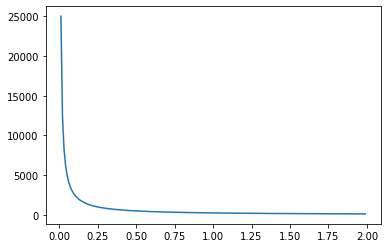

In [8]:
def fun():
    import matplotlib.pyplot as plt
    max_pe = 1000
    k = 250
    q1 = 1
    q2 = 1
    right_charge_pos = ValueTracker(-2)
    left_charge_pos = ValueTracker(-6)
    scale = 4/1.2
    def get_r():
        return (right_charge_pos.get_value() - left_charge_pos.get_value()) / scale
    def get_pe(r=None):
        if r is None:
            r = get_r()
        return k * q1 * q2 / r
    rs = np.arange(0, 2, 0.01)
    ys = np.array([get_pe(r) for r in rs])
    print(rs[np.where(ys > 1500)])
    plt.plot(rs, ys)
fun()


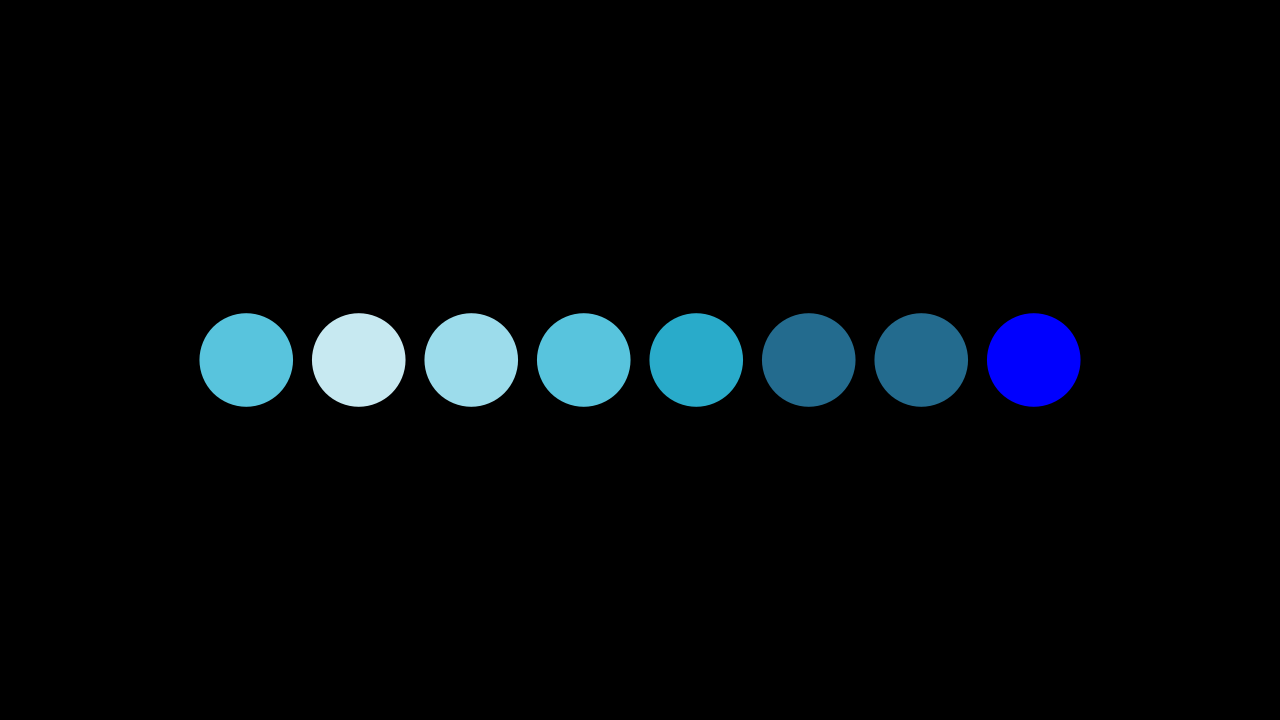

In [66]:
%%manim -v WARNING -qm Foolery

class Foolery(Scene):
    def construct(self):
        circles = VGroup(
            *[Circle(radius=0.5, fill_opacity=1).set_color(color) for color in
            (BLUE, BLUE_A, BLUE_B, BLUE_C, BLUE_D, BLUE_E, DARK_BLUE, PURE_BLUE)]
        ).arrange(RIGHT)
        self.add(circles)


In [7]:
%%manim -v WARNING -ql Foolery2

class Foolery2(Scene):
    def construct(self):
        alpha = ValueTracker(0)
        circle1 = always_redraw(lambda: Circle(radius=2, fill_opacity=1).set_color((RED, interpolate_color(RED, BLACK, alpha.get_value()), BLACK)).shift(LEFT * 2))
        circle2 = Circle(radius=2, fill_opacity=1, color=RED).shift(RIGHT * 2)
        circle1.radial_gradient = True
        circle2.radial_gradient = True
        self.add(circle1, circle2)
        self.play(alpha.animate.set_value(1), rate_func=linear)
        self.play(alpha.animate.set_value(0), rate_func=linear)
        


In [8]:
def myfun():
    circle = Circle(radius=4, fill_opacity=1)
    radius = [(np.dot(point - circle.get_center(), point - circle.get_center()), point) for point in circle.points]
    radius.sort(key=lambda o: o[0])
    print(radius[0], radius[-1])
myfun()

(16.0, array([4., 0., 0.])) (17.096622711232154, array([-3.56890761, -2.08794664,  0.        ]))
